In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_hdf('/project/lgrandi/shockley/update_run18930.hdf', 'data')

df.head()

,led_amplitude,led_charge,noise_amplitude,noise_charge
0,"[4.0, 3.0, 4.0, 3.0, 173.0, 58.0, 6.0, 4.0, 2....","[11.4166666667, -17.5, -32.0, -45.0, 469.41666...","[2.0, 4.0, 4.0, 5.0, 6.0, 4.0, 6.0, 4.0, 4.0, ...","[8.33333333333, 1.66666666667, -34.5833333333,..."
1,"[5.0, 11.0, 5.0, 5.0, 8.0, 7.0, 9.0, 4.0, 5.0,...","[13.8333333333, 21.1666666667, -90.3333333333,...","[3.0, 3.0, 3.0, 3.0, 4.0, 5.0, 6.0, 4.0, 4.0, ...","[-14.0833333333, -6.08333333333, -2.25, 6.0833..."
2,"[6.0, 5.0, 5.0, 46.0, 5.0, 5.0, 7.0, 19.0, 4.0...","[-18.8333333333, -22.8333333333, 25.0, 201.416...","[4.0, 5.0, 5.0, 4.0, 4.0, 3.0, 5.0, 4.0, 3.0, ...","[-36.25, -0.166666666667, -15.25, 4.5, -7.0, -..."
3,"[4.0, 3.0, 3.0, 8.0, 4.0, 4.0, 6.0, 4.0, 5.0, ...","[5.75, -9.0, 8.41666666667, 53.4166666667, -4....","[5.0, 7.0, 5.0, 3.0, 4.0, 6.0, 6.0, 4.0, 6.0, ...","[-34.25, -22.0833333333, -1.08333333333, 24.0,..."
4,"[4.0, 4.0, 8.0, 3.0, 4.0, 5.0, 5.0, 3.0, 2.0, ...","[-11.25, 4.33333333333, 39.75, 23.5, -24.5, 59...","[6.0, 3.0, 3.0, 5.0, 6.0, 4.0, 6.0, 6.0, 3.0, ...","[6.91666666667, -38.0833333333, -40.3333333333..."


In [3]:
def get_ch(ch):
    def func(row):
        new_row = pd.Series()
        for col in row.index:
            new_row[col] = row[col][ch]
        return new_row
    return func
    

In [4]:
new_df = df.apply(get_ch(175), axis=1)


In [5]:
new_df.head()

,led_amplitude,led_charge,noise_amplitude,noise_charge
0,5.0,1.000000,5.0,-7.083333
1,10.0,21.000000,5.0,-32.416667
2,124.0,277.666667,6.0,7.166667
3,8.0,30.750000,8.0,-19.916667
4,130.0,453.250000,6.0,2.833333


In [63]:
import multihist as mh

led_hist = mh.Histdd(new_df['led_charge'], new_df['led_amplitude'], axis_names=['charge', 'amplitude'], bins=500, 
                 range=[(-100, 1000), (-100, 1000)])

noise_hist = mh.Histdd(new_df['noise_charge'], new_df['noise_amplitude'], axis_names=['charge', 'amplitude'], bins=500, 
                 range=[(-100, 1000), (-100, 1000)])

q_bins=noise_hist.bin_centers(axis='charge')
amp_bins=noise_hist.bin_centers(axis='amplitude')

amp_noise_percentile=noise_hist.percentile(33, "amplitude")
charge_noise_percentile=noise_hist.percentile(33, 'charge')

In [64]:
def correction_threshold(f, hist):
    """returns bin to correct to, given an f value and a noise spectrum"""
    fs = np.cumsum(hist)/np.sum(hist)
    return np.where(np.absolute(fs - f) == min(np.absolute(fs - f)))[0]

[-30.7] [-10.9] [ 8.9]


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_v6.8.0/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


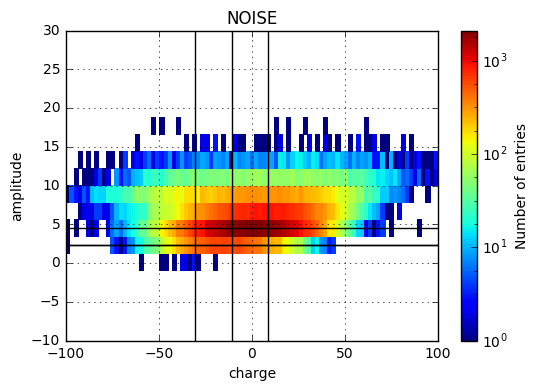

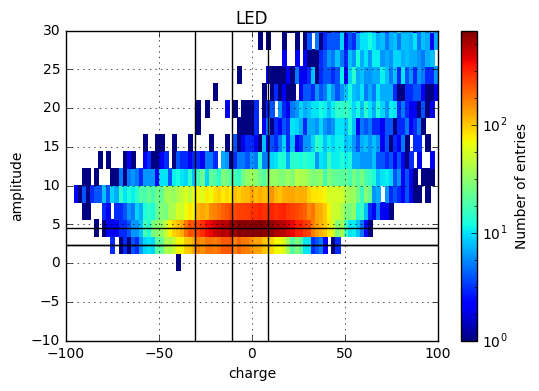

In [78]:
f1=0.1
f2=0.333
f3=0.666 
amp_thresh1=correction_threshold(f1, noise_hist.project('amplitude'))
charge_thresh1=correction_threshold(f1, noise_hist.project('charge'))

amp_thresh2=correction_threshold(f2, noise_hist.project('amplitude'))
charge_thresh2=correction_threshold(f2, noise_hist.project('charge'))

amp_thresh3=correction_threshold(f3,noise_hist.project('amplitude'))
charge_thresh3=correction_threshold(f3,noise_hist.project('charge'))

print(q_bins[charge_thresh1], q_bins[charge_thresh2], q_bins[charge_thresh3])

noise_hist.plot(log_scale=True)
plt.xlim(-100, 100)
plt.ylim(-10, 30)
plt.title('NOISE')
plt.axvline(x=q_bins[charge_thresh1], color='k')
plt.axhline(y=amp_bins[amp_thresh1], color='k')
plt.axvline(x=q_bins[charge_thresh2], color='k')
plt.axhline(y=amp_bins[amp_thresh2], color='k')
plt.axvline(x=q_bins[charge_thresh3], color='k')
plt.axhline(y=amp_bins[amp_thresh3], color='k')
#amp_noise_percentile.plot(label='amp percentile', color='k')
#charge_noise_percentile.plot(label='charge percentile', color='gray')
plt.legend()
plt.grid()
plt.show()

led_hist.plot(log_scale=True)
#amp_noise_percentile.plot(label='amp percentile', color='k')
#charge_noise_percentile.plot(label='charge percentile', color='gray')
plt.xlim(-100, 100)
plt.ylim(-10, 30)
plt.title('LED')
plt.axvline(x=q_bins[charge_thresh1], color='k')
plt.axhline(y=amp_bins[amp_thresh1], color='k')
plt.axvline(x=q_bins[charge_thresh2], color='k')
plt.axhline(y=amp_bins[amp_thresh2], color='k')
plt.axvline(x=q_bins[charge_thresh3], color='k')
plt.axhline(y=amp_bins[amp_thresh3], color='k')
plt.legend()
plt.grid()
plt.show()

#led.plot(log_scale=True)
#plt.xlim(-100, 100)
#plt.ylim(-10, 30)
#plt.title("Subtracted")
#plt.grid()
#plt.show()